In [1]:
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

style='../mpl_styles/spykes.mplstyle'
plt.style.use(style)

In [2]:
from spykes.neuropop import NeuroPop

### Create a NeuroPop object

In [3]:
n_neurons = 10
pop = NeuroPop(n_neurons=n_neurons, tunemodel='glm')

### Simulate a population of neurons

In [4]:
# Simulate a population of neurons
n_samples = 1000
x, Y, mu, k0, k, g, b = pop.simulate(pop.tunemodel, n_samples=n_samples, winsize=400.0)

### Split into training and testing sets

In [5]:
from sklearn.cross_validation import train_test_split
Y_train, Y_test, x_train, x_test = train_test_split(Y, x, test_size=0.5, random_state=42)

### Fit the tuning curves with gradient descent

In [6]:
pop.fit(x_train, Y_train)

### Predict the population activity with the fit tuning curves

In [7]:
Yhat_test = pop.predict(x_test)

### Score the prediction

In [8]:
Ynull = np.mean(Y_train, axis=0)
pseudo_R2 = pop.score(Y_test, Yhat_test, Ynull, method='pseudo_R2')
print pseudo_R2

[0.015708742765651595, 0.88548228496430081, 0.64953549349519391, 0.7102359690739799, -0.10208578347625186, 0.1902246866369538, 0.87209044139582448, 0.52223845031890392, 0.8791167973194528, 0.8980274072137493]


### Plot the simulated and fit tuning curves

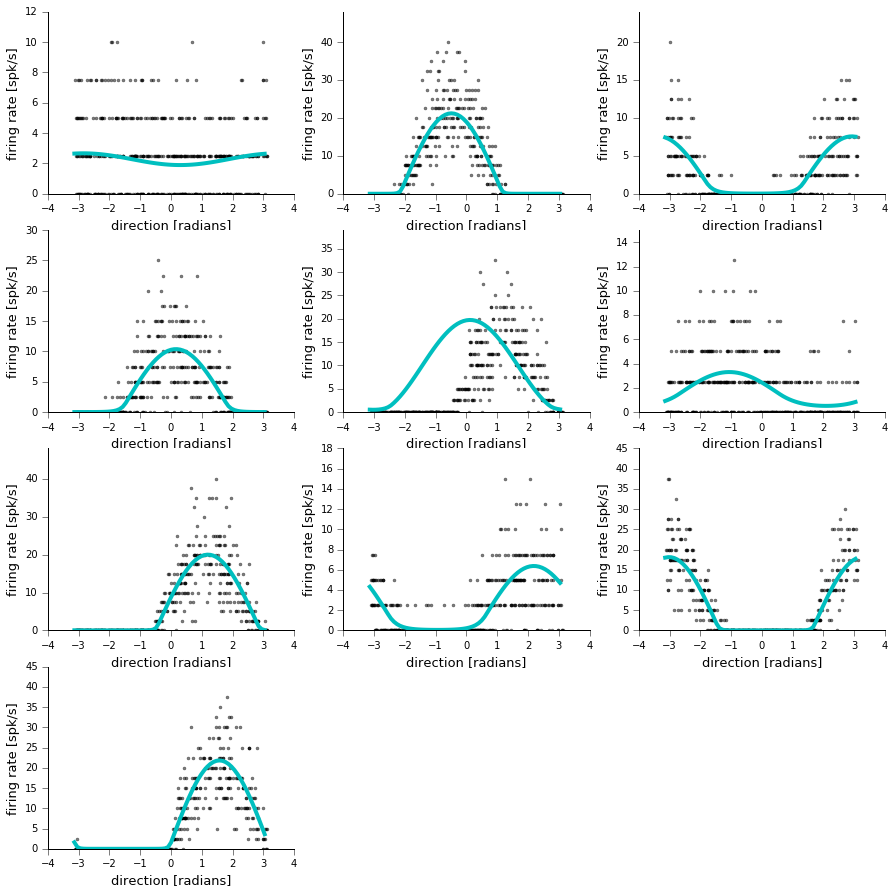

In [9]:
plt.figure(figsize=[15,15])

for neuron in range(pop.n_neurons):
    plt.subplot(4,3,neuron+1)
    pop.display(x_test, Y_test[:, neuron], neuron=neuron, 
                ylim=[0.8*np.min(Y_test[:, neuron]), 1.2*np.max(Y_test[:, neuron])])

plt.show()

### Decode feature from the population activity

In [10]:
xhat_test = pop.decode(Y_test)

### Visualize ground truth vs. decoded estimates

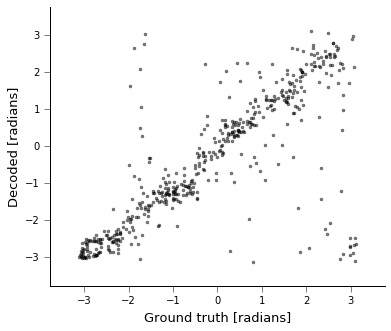

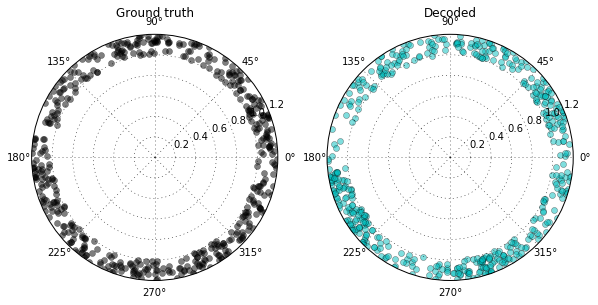

In [11]:
plt.figure(figsize=[6,5])

plt.plot(x_test, xhat_test, 'k.', alpha=0.5)
plt.xlim([-1.2*np.pi, 1.2*np.pi])
plt.ylim([-1.2*np.pi, 1.2*np.pi])
plt.xlabel('Ground truth [radians]')
plt.ylabel('Decoded [radians]')
plt.tick_params(axis='y', right='off')
plt.tick_params(axis='x', top='off')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.figure(figsize=[15,5])
jitter = 0.2*np.random.rand(x_test.shape[0])
plt.subplot(132, polar=True)
plt.plot(x_test, np.ones(x_test.shape[0]) + jitter, 'ko', alpha=0.5)
plt.title('Ground truth')

plt.subplot(133, polar=True)
plt.plot(xhat_test, np.ones(xhat_test.shape[0]) + jitter, 'co', alpha=0.5)
plt.title('Decoded')
plt.show()

### Score decoding performance

In [12]:
# Circular correlation
circ_corr = pop.score(x_test, xhat_test, method='circ_corr')
print 'Circular correlation: %f' % (circ_corr)

Circular correlation: 0.732707


In [13]:
# Cosine distance
cosine_dist = pop.score(x_test, xhat_test, method='cosine_dist')
print 'Cosine distance: %f' % (cosine_dist)

Cosine distance: 0.827625
